# Project 2 - Ames Housing Dataset

We are building a model to predict housing prices for this project. So our predictor variable is Sale Price and the target columns are our features. The features are further split into numerical and categorical features

First step involves importing the datasets and libraries

In [1]:
#Loading the .csv files into dataframes labelled test and train
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import seaborn as sns
import sklearn.metrics as metrics
import sklearn.linear_model as linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


%matplotlib inline
test = pd.read_csv("/Users/vxp11/notebooks/DSI-US-5/project-2/test.csv")
train = pd.read_csv("/Users/vxp11/notebooks/DSI-US-5/project-2/train.csv")


In the next step we print out the .head() function for both the test and train data sets to understand what our problem  is.

In [2]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [3]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


# EDA


Since we are going to be building our model for the training set and then the test set, we chek for any null values in the data

In [4]:
train.isnull().sum()

Id                   0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       330
Lot Area             0
Street               0
Alley             1911
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        22
Mas Vnr Area        22
Exter Qual           0
Exter Cond           0
                  ... 
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
Kitchen Qual         0
TotRms AbvGrd        0
Functional           0
Fireplaces           0
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area

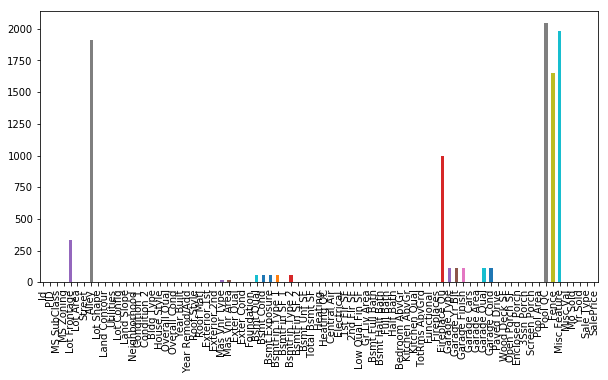

In [5]:
import matplotlib.pyplot as plt
train.isnull().sum().plot(kind='bar', figsize=(10, 5))

In [6]:
train_corr = train.corr()
train_corr

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Id,1.000000,0.175793,0.026543,-0.024967,0.032872,-0.061483,-0.026096,-0.064444,-0.090040,-0.035493,...,-0.009045,0.001382,0.033747,-0.022791,0.009758,0.055696,-0.012683,0.127723,-0.975747,-0.051398
PID,0.175793,1.000000,-0.003632,-0.091291,0.024135,-0.265863,0.106861,-0.347039,-0.176666,-0.247959,...,-0.041221,-0.081129,0.150179,-0.024679,-0.042030,0.005825,0.004223,-0.032735,0.008476,-0.255052
MS SubClass,0.026543,-0.003632,1.000000,-0.389790,-0.245484,0.035763,-0.070141,0.035983,0.044836,-0.004047,...,0.001622,-0.020289,-0.039842,-0.030088,-0.038819,-0.004585,-0.027485,0.013027,-0.032870,-0.087335
Lot Frontage,-0.024967,-0.091291,-0.389790,1.000000,0.574024,0.194808,-0.054455,0.109504,0.085052,0.218218,...,0.115180,0.184958,-0.003302,0.031855,0.074819,0.156575,0.051676,-0.017389,0.009112,0.341842
Lot Area,0.032872,0.024135,-0.245484,0.574024,1.000000,0.105824,-0.019185,0.036002,0.050771,0.169379,...,0.155623,0.140864,0.014139,0.019553,0.067714,0.115102,0.093922,0.003197,-0.029454,0.296566
Overall Qual,-0.061483,-0.265863,0.035763,0.194808,0.105824,1.000000,-0.082770,0.602964,0.584654,0.438685,...,0.257081,0.308855,-0.154554,0.031938,0.048752,0.006558,0.022099,0.019242,-0.011578,0.800207
Overall Cond,-0.026096,0.106861,-0.070141,-0.054455,-0.019185,-0.082770,1.000000,-0.370988,0.042614,-0.135878,...,0.011034,-0.052266,0.108320,0.026907,0.047359,-0.005806,0.014269,-0.003144,0.047664,-0.097019
Year Built,-0.064444,-0.347039,0.035983,0.109504,0.036002,0.602964,-0.370988,1.000000,0.629116,0.329741,...,0.216339,0.207798,-0.380082,0.016104,-0.037866,0.003728,0.000626,-0.007083,-0.003559,0.571849
Year Remod/Add,-0.090040,-0.176666,0.044836,0.085052,0.050771,0.584654,0.042614,0.629116,1.000000,0.211443,...,0.216271,0.264476,-0.237523,0.040416,-0.041211,-0.022382,-0.001704,0.011568,0.042744,0.550370
Mas Vnr Area,-0.035493,-0.247959,-0.004047,0.218218,0.169379,0.438685,-0.135878,0.329741,0.211443,1.000000,...,0.163584,0.163489,-0.107104,0.011161,0.086631,0.012422,0.079219,-0.001472,-0.018719,0.512230


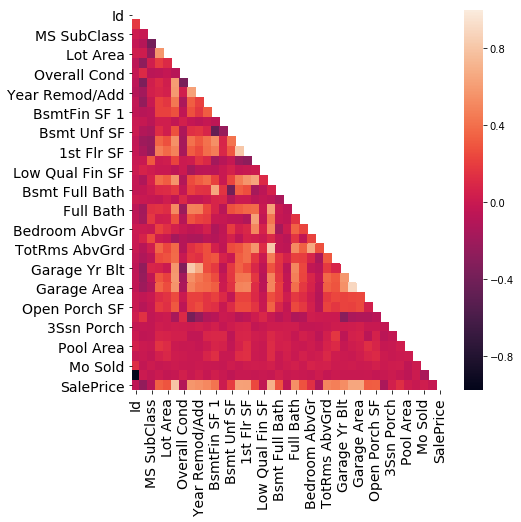

In [7]:
# Set the default matplotlib figure size to 7x7:
fig, ax = plt.subplots(figsize = (7,7))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(train_corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(train_corr, mask = mask, ax = ax)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize = 14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize = 14)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

In [8]:
train.dtypes

Id                  int64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
Lot Area            int64
Street             object
Alley              object
Lot Shape          object
Land Contour       object
Utilities          object
Lot Config         object
Land Slope         object
Neighborhood       object
Condition 1        object
Condition 2        object
Bldg Type          object
House Style        object
Overall Qual        int64
Overall Cond        int64
Year Built          int64
Year Remod/Add      int64
Roof Style         object
Roof Matl          object
Exterior 1st       object
Exterior 2nd       object
Mas Vnr Type       object
Mas Vnr Area      float64
Exter Qual         object
Exter Cond         object
                   ...   
Half Bath           int64
Bedroom AbvGr       int64
Kitchen AbvGr       int64
Kitchen Qual       object
TotRms AbvGrd       int64
Functional         object
Fireplaces          int64
Fireplace Qu

In [9]:
train.shape

(2051, 81)

In [10]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


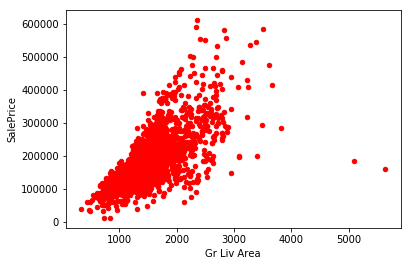

In [32]:
train.plot(kind='scatter', y='SalePrice', x='Gr Liv Area', color='red')

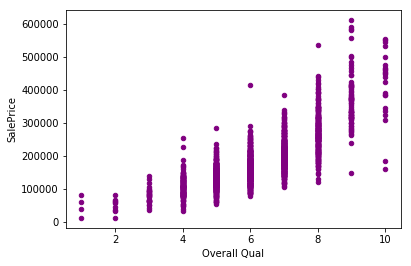

In [33]:
train.plot(kind='scatter', y='SalePrice', x='Overall Qual', color='purple')

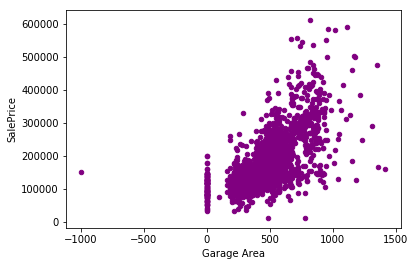

In [36]:
train.plot(kind='scatter', y='SalePrice', x='Garage Area', color='purple')

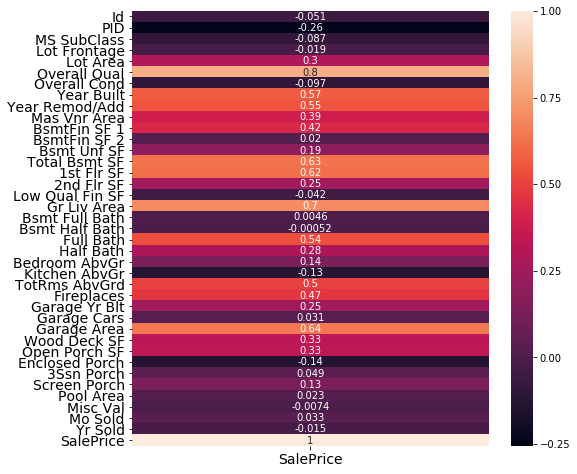

In [30]:
fig, ax = plt.subplots(figsize = (8,8))

# Plot the heatmap with seaborn.

ax = sns.heatmap(train.corr()[['SalePrice']], ax = ax,annot =True)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize = 14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize = 14)

plt.show()

# Separating the numerical features 

In [11]:
numerical_features = list(train._get_numeric_data().drop(['Id','PID','SalePrice'],axis=1).columns)


In [12]:
combined_features = numerical_features

In [13]:
train[combined_features].head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
0,60,NaN,13517,6,8,1976,2005,289.0,533.0,0.0,...,475.0,0,44,0,0,0,0,0,3,2010
1,60,43.0,11492,7,5,1996,1997,132.0,637.0,0.0,...,559.0,0,74,0,0,0,0,0,4,2009
2,20,68.0,7922,5,7,1953,2007,0.0,731.0,0.0,...,246.0,0,52,0,0,0,0,0,1,2010
3,60,73.0,9802,5,5,2006,2007,0.0,0.0,0.0,...,400.0,100,0,0,0,0,0,0,4,2010
4,50,82.0,14235,6,8,1900,1993,0.0,0.0,0.0,...,484.0,0,59,0,0,0,0,0,3,2010


Checking for null values in our predictor variables

In [14]:
train[combined_features].isnull().sum()

MS SubClass          0
Lot Frontage       330
Lot Area             0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Mas Vnr Area        22
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Full Bath       2
Bsmt Half Bath       2
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
TotRms AbvGrd        0
Fireplaces           0
Garage Yr Blt      114
Garage Cars          1
Garage Area          1
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
Mo Sold              0
Yr Sold              0
dtype: int64

# Separating our categorical features

In [15]:
for features in numerical_features:
    train[features] = train[features].fillna(-999)
    test[features] = test[features].fillna(-999)

In [16]:
categ_features = (train.select_dtypes(include = 'object').columns)

In [17]:
train[categ_features].isnull().sum()

MS Zoning            0
Street               0
Alley             1911
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        22
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin Type 2      56
Heating              0
Heating QC           0
Central Air          0
Electrical           0
Kitchen Qual         0
Functional           0
Fireplace Qu      1000
Garage Type        113
Garage Finish      114
Garage Qual        114
Garage Cond        114
Paved Drive          0
Pool QC           2042
Fence             1651
Misc Feature      1986
Sale Type            0
dtype: int64

In [18]:
for col in categ_features:
    
    train[col] = train[col].fillna('N/A')
    test[col] = test[col].fillna('N/A')
    
    train_values = sorted(list(train[col].unique()))
    test_values = sorted(list(test[col].unique()))
    
    categories = set(train_values + test_values)
    
    train[col] = pd.Categorical(train[col], categories=categories)
    test[col] = pd.Categorical(test[col], categories=categories)


In [19]:
train_dummies = pd.get_dummies(train[categ_features])
test_dummies = pd.get_dummies(test[categ_features])


In [20]:
X_train = pd.concat([train_dummies,train[numerical_features]],axis=1)
X_test = pd.concat([test_dummies,test[numerical_features]],axis=1)

#  Modelling 

In [21]:
params = {}
gs = GridSearchCV(RandomForestRegressor(), param_grid=params)
gs.fit(X_train,train['SalePrice'])
print(gs.best_score_)
print(gs.best_params_)

0.8793647067975842
{}


In [22]:
pred = gs.predict(X_test)

In [23]:
test['SalePrice'] = pred

In [24]:
test[['Id','SalePrice']].to_csv('VP2.csv',index=False)

Printing out our predictor variables in the last step

In [25]:
test['SalePrice']

0      146830.0
1      150635.8
2      172217.5
3      112663.0
4      168100.0
5       89155.0
6      123177.6
7      152900.0
8      186127.5
9      165210.0
10     164400.0
11     124480.0
12     154070.0
13     247500.0
14     185060.0
15     129118.2
16     135725.0
17     114730.0
18     188760.0
19     230400.0
20     139125.0
21     124970.0
22     191470.0
23     144220.0
24     169473.3
25     118680.0
26     119616.4
27     123295.1
28     146675.0
29      58031.1
         ...   
849    127551.0
850    164640.0
851    166273.3
852    159535.0
853    126855.0
854    139090.0
855    167950.0
856    103678.4
857    225634.9
858     91200.0
859    187000.0
860    121300.0
861    366540.0
862    140420.0
863    129700.0
864    165215.0
865    149393.5
866    193858.8
867    211500.0
868    239040.0
869    171709.2
870    147520.5
871    249124.0
872    358282.1
873    192430.0
874    201760.0
875    226450.0
876    124420.0
877    120040.0
878    125880.0
Name: SalePrice, Length: